In [ ]:
import os
import scanpy as sc
import anndata as ad
import biopython as bp

ModuleNotFoundError: No module named 'biopython'

In [4]:
file = 'bb8f672d-593d-4820-b963-bc7ba00eae18.h5ad'
adata = sc.read_h5ad(file)


In [21]:
# mitochondrial genes, "MT-" for human, "Mt-" for mouse
adata.var["microglial"] = adata.var_names.str.startswith("EC")

In [5]:
sc.pp.calculate_qc_metrics(
    adata, inplace=True, log1p=True
)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


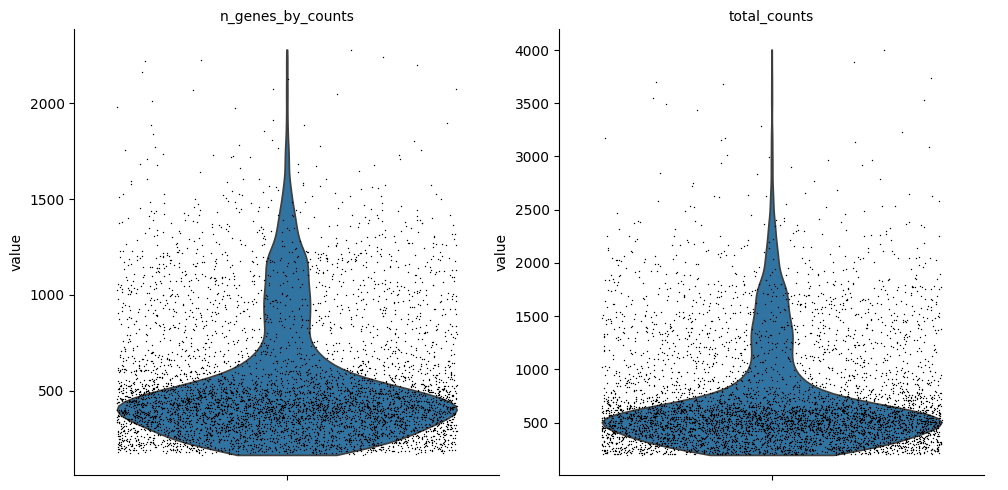

In [6]:
sc.pl.violin(
    adata,
    ["n_genes_by_counts", "total_counts"],
    jitter=0.4,
    multi_panel=True,
)

In [32]:
sc.pp.filter_cells(adata, min_genes=100)
sc.pp.filter_genes(adata, min_cells=3)

In [33]:
sc.pp.scrublet(adata)

In [34]:
#Normalize and Log
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

In [35]:
sc.pp.highly_variable_genes(adata, n_top_genes=2000)

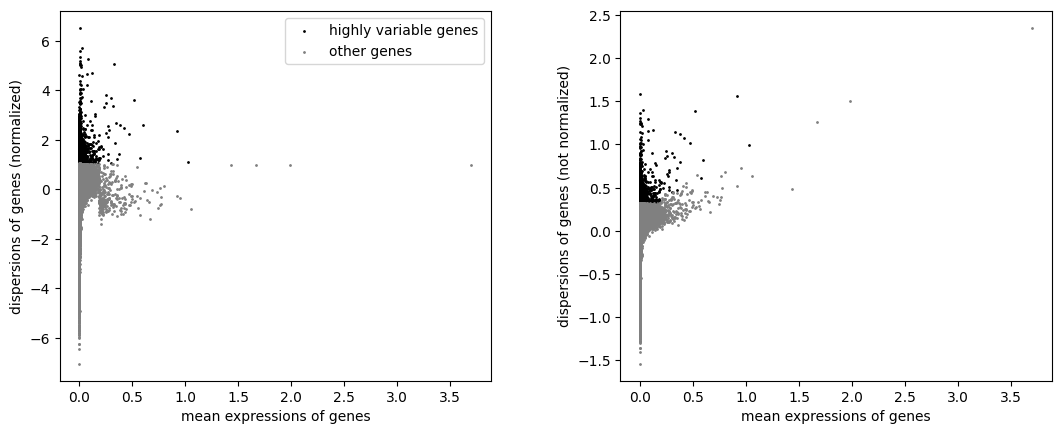

In [36]:
sc.pl.highly_variable_genes(adata)

In [37]:
sc.tl.pca(adata)

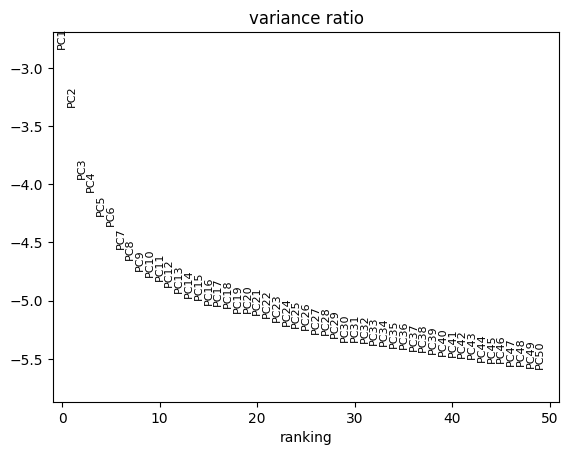

In [38]:
sc.pl.pca_variance_ratio(adata, n_pcs=50, log=True)

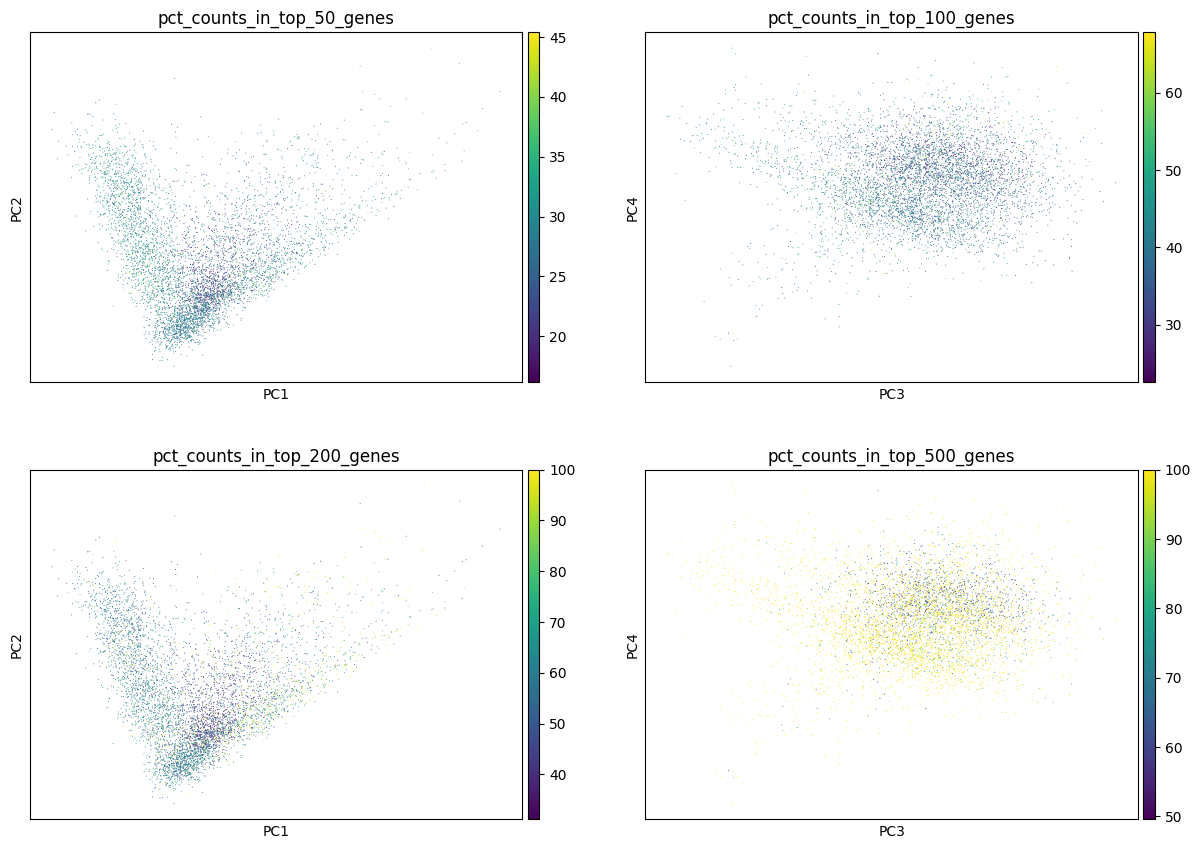

In [44]:
sc.pl.pca(
    adata,
    color=["pct_counts_in_top_50_genes", "pct_counts_in_top_100_genes", "pct_counts_in_top_200_genes", "pct_counts_in_top_500_genes"],
    dimensions=[(0, 1), (2, 3), (0, 1), (2, 3)],
    ncols=2,
    size=2,
)

In [45]:
sc.pp.neighbors(adata)

/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [46]:
sc.tl.umap(adata)

In [59]:
sc.tl.leiden(adata, flavor="igraph", n_iterations=2)

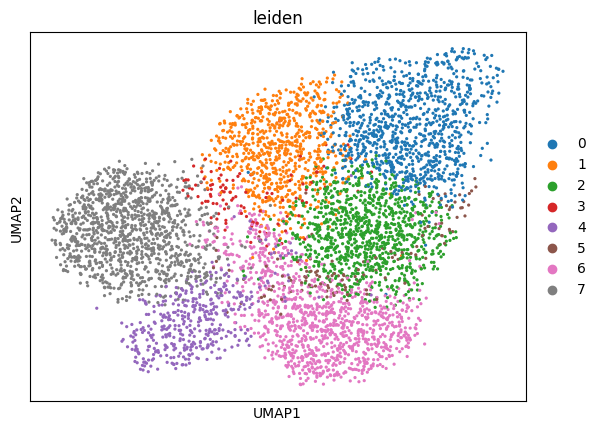

In [70]:
sc.pl.umap(adata, color=["leiden"])

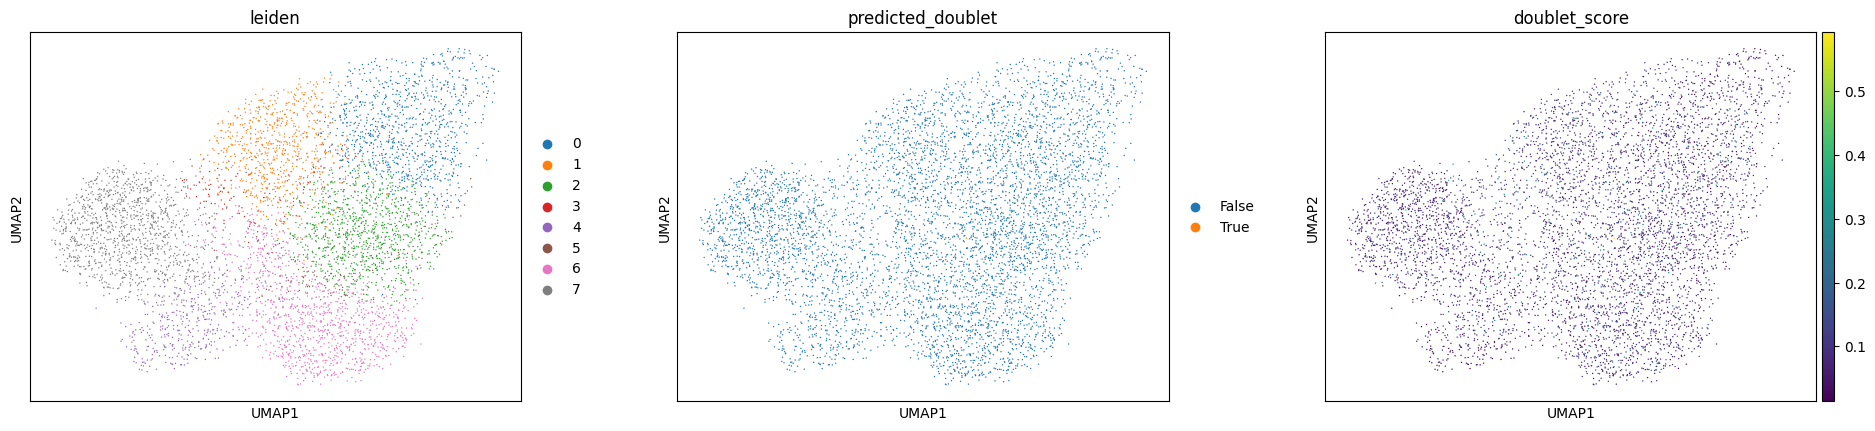

In [63]:
sc.pl.umap(
    adata,
    color=["leiden", "predicted_doublet", "doublet_score"],
    wspace=0.2,
    size=4,
)

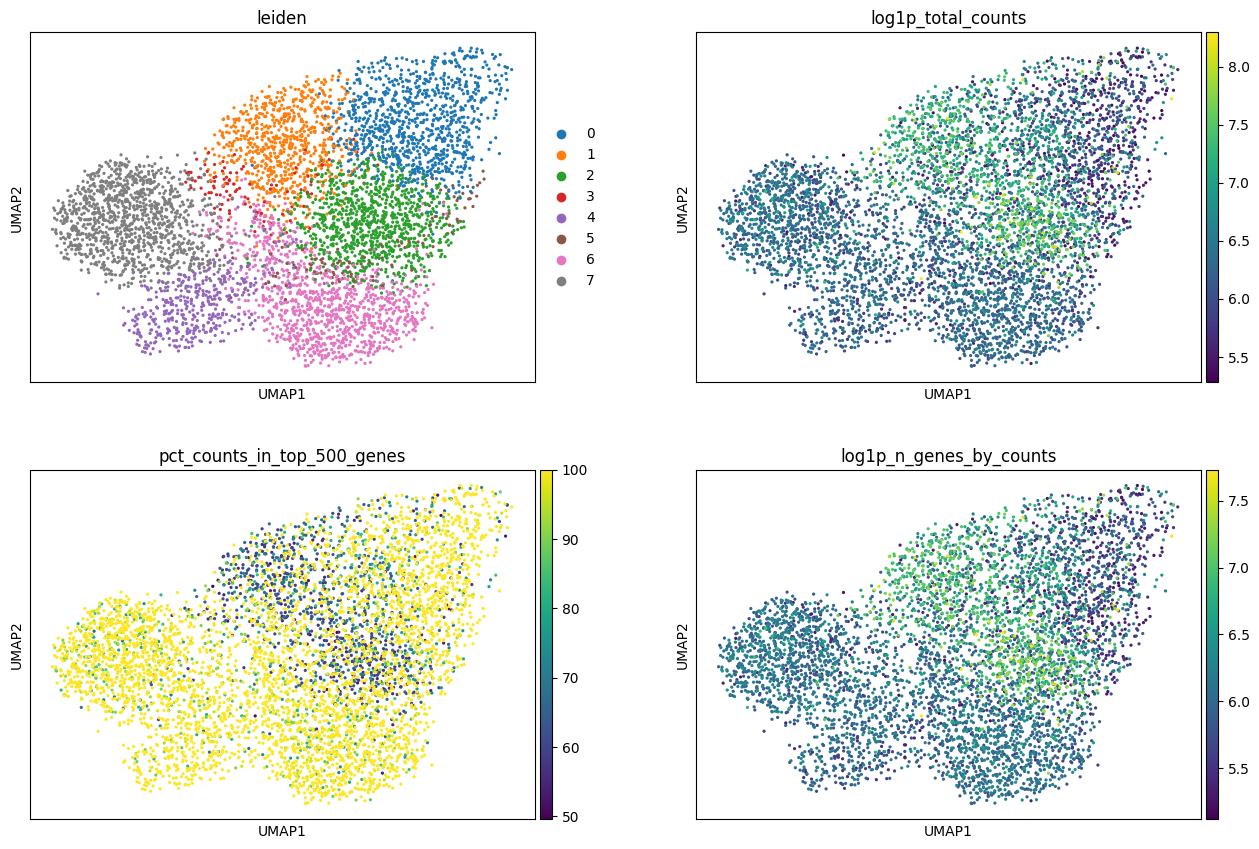

In [65]:
sc.pl.umap(
    adata,
    color=["leiden", "log1p_total_counts", "pct_counts_in_top_500_genes", "log1p_n_genes_by_counts"],
    wspace=0.2,
    ncols=2,
)

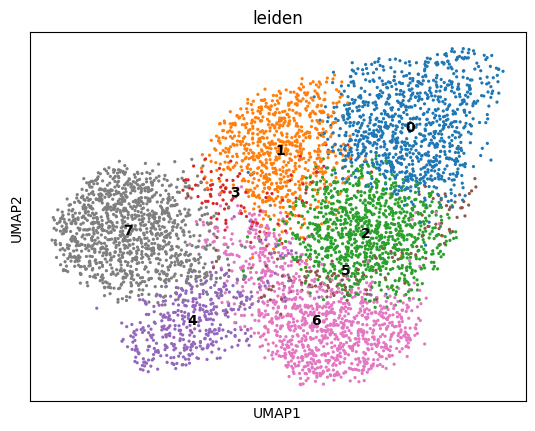

In [72]:
sc.pl.umap(
    adata,
    color=["leiden"],
    legend_loc="on data",
)

In [81]:
for res in [0.02, 0.5, 2.0]:
    sc.tl.leiden(
        adata, key_added=f"leiden_res_{res:4.2f}", resolution=res, flavor="igraph"
    )

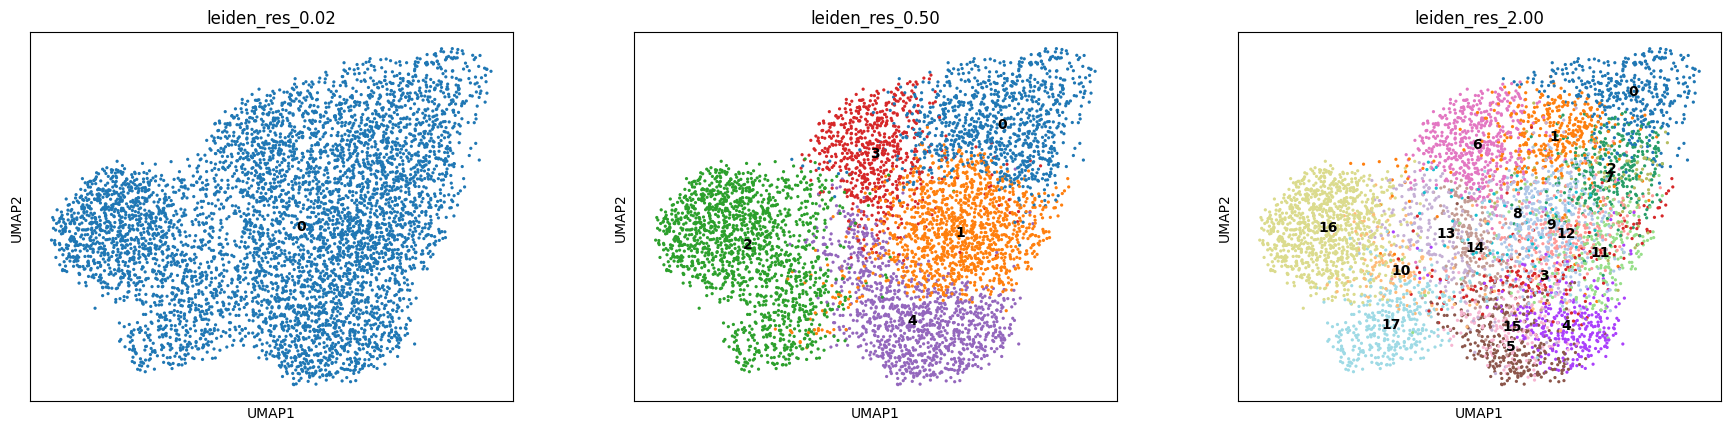

In [82]:
sc.pl.umap(
    adata,
    color=["leiden_res_0.02", "leiden_res_0.50", "leiden_res_2.00"],
    legend_loc="on data",
)

In [174]:
sc.tl.rank_genes_groups(adata, groupby="leiden_res_0.50", method="wilcoxon")

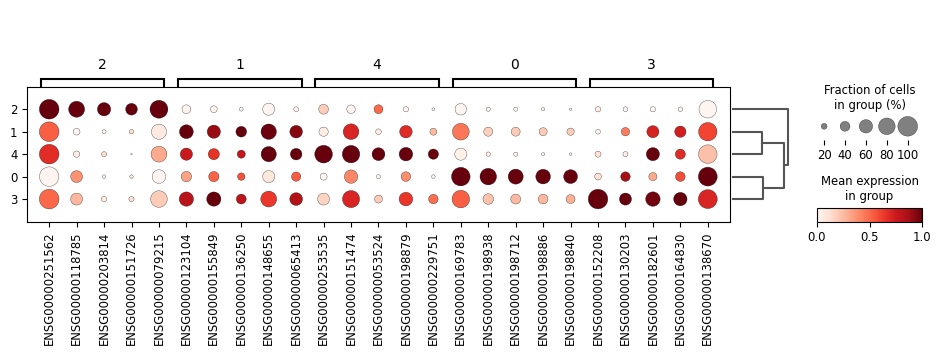

In [175]:
sc.pl.rank_genes_groups_dotplot(
    adata, groupby="leiden_res_0.50", standard_scale="var", n_genes=5
)

In [211]:
print(adata.var_names)


Index(['ENSG00000100568', 'ENSG00000101440', 'ENSG00000136630',
       'ENSG00000231731', 'ENSG00000155330', 'ENSG00000147421',
       'ENSG00000108469', 'ENSG00000122584', 'ENSG00000271737',
       'ENSG00000154025',
       ...
       'ENSG00000246379', 'ENSG00000116001', 'ENSG00000101189',
       'ENSG00000258537', 'ENSG00000143727', 'ENSG00000254659',
       'ENSG00000163162', 'ENSG00000185189', 'ENSG00000188352',
       'ENSG00000008394'],
      dtype='object', length=21292)
